# WhatsApp Chat Analysis with Python

WhatsApp is undoubtedly one of the most popular messenger applications globally, boasting over 2 billion users. The sheer volume of its usage is staggering, with a mind-boggling 65 billion messages exchanged on the platform every single day. With this wealth of data at our fingertips, we can leverage WhatsApp chats to conduct insightful analyses of our conversations with friends, customers, or even within groups. In this article, I will guide you through the process of WhatsApp Chat Analysis using Python.

## WhatsApp Chat Analysis

You can use your WhatsApp data for many data science tasks like sentiment analysis, keyword extraction, named entity recognition, text analysis and several other natural language processing tasks. It also depends on who you are analyzing your WhatsApp messages with because you can find a lot of information from your WhatsApp messages which can also help you to solve business problems.

Before starting with the task of WhatsApp Chat analysis with Python you need to extract your WhatsApp data from your smartphone which is a very easy task. To extract your WhatsApp chats, just open any chat with a person or a group and follow the steps mentioned below:

If you are having an iPhone then tap on the Contact Name or the Group Name. In case you are having an Android smartphone then tap on the 3 dots above.
Then scroll to the bottom and top on Export Chat.
Then select without media for simplicity if it asks you whether you want your chats with or without media.
Then email this chat to yourself and download it to your system.

So this is how you can easily get your WhatsApp chats with any person or a group for the task of WhatsApp chat analysis. In the section below, I will take you through a simple WhatsApp chat analysis with Python.

Now let’s start this task by importing the necessary Python libraries that we need for this task:

In [1]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

The dataset we are using here requires a lot of preparation, so I suggest you take a look at the data you are using before starting this WhatsApp chat analysis task. As I have already walked through the dataset, so I’ll start by writing a few Python functions to prepare the data before importing it:

In [2]:
def date_time(s):
    pattern = '\[\d{1,2}/\d{1,2}/\d{4}, \d{1,2}:\d{2}:\d{2} [AP]M\]'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False
    
def getDatapoint(line):
    splitline = line.split('] ')
    dateTime = splitline[0].strip('[')
    date, time = dateTime.split(", ")
    message = "".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = "".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

Now let’s import the data and prepare it in a way that we can use it in a pandas DataFrame:


In [3]:
data = []
conversation = '_chat.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip() # removing any leading, and trailing whitespaces
        s2 = ['audio omitted','image omitted']
        
        if (s2[0] in line or s2[1] in line):
            line = line[1:]
        
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            message.strip('\u200e')
            if('‎' in message):
                message = message[1:]
            messageBuffer.append(message)
            
        else:
            messageBuffer.append(line)




Our dataset is completely ready now for the task of WhatsApp chat analysis with Python. Now let’s have a look at the last 20 messages and some other insights from the data:

In [4]:

df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.head(20))
print(df.info())
print(df.Author.unique())

         Date         Time     Author  \
0  2023-09-20  10:34:32 PM    Queen 👑   
1  2023-09-20  11:13:28 PM    Queen 👑   
2  2023-09-20  11:13:33 PM  Abdesamie   
3  2023-09-20  11:13:41 PM    Queen 👑   
4  2023-09-20  11:13:52 PM  Abdesamie   
5  2023-09-20  11:14:02 PM    Queen 👑   
6  2023-09-20  11:14:18 PM  Abdesamie   
7  2023-09-20  11:14:37 PM  Abdesamie   
8  2023-09-20  11:14:51 PM  Abdesamie   
9  2023-09-20  11:14:51 PM    Queen 👑   
10 2023-09-20  11:15:07 PM  Abdesamie   
11 2023-09-20  11:15:22 PM    Queen 👑   
12 2023-09-20  11:15:36 PM    Queen 👑   
13 2023-09-20  11:15:47 PM    Queen 👑   
14 2023-09-20  11:15:55 PM    Queen 👑   
15 2023-09-20  11:16:01 PM    Queen 👑   
16 2023-09-20  11:16:27 PM    Queen 👑   
17 2023-09-20  11:16:48 PM    Queen 👑   
18 2023-09-20  11:17:11 PM  Abdesamie   
19 2023-09-20  11:17:31 PM  Abdesamie   

                                              Message  
0                                          Hey babe 😂  
1                         

Let’s have a look at the total number of messages between this WhatsApp chat:

In [5]:
total_messages = df.shape[0]
print(total_messages)

766


the total number of media messages present in this chat:



In [6]:
audio_messages = df[df["Message"]=='audio omitted'].shape[0]
image_messages = df[df["Message"]=='image omitted'].shape[0]
media_messages = audio_messages+image_messages
print(media_messages)

119


Now let’s extract the emojis present in between the chats and have a look at the emojis present in this chat:

In [7]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

df['emoji'] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)


523


extracting the URLs present in this chat and have a look at the final insights:

In [8]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Suzy and Abdo")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats between Suzy and Abdo
Total Messages:  766
Number of Media Shared:  119
Number of Emojis Shared 523
Number of Links Shared 0


In [9]:
df1 = df[df['Message'] == 'audio omitted']
df2 = df[df['Message'] == 'image omitted']

media_messages_df = pd.concat([df1, df2], axis=0)

In [10]:
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['Queen 👑','Abdesamie']

for i in range(len(l)):
  # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
    print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Average Words per message', words_per_message)
  #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)
  # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
  #links consist of total links
    links = sum(req_df["urlcount"])   
    print('Links Sent', links)

Stats of Queen 👑 -
Messages Sent 433
Average Words per message 3.3348729792147807
Media Messages Sent 57
Emojis Sent 368
Links Sent 0
Stats of Abdesamie -
Messages Sent 214
Average Words per message 3.5
Media Messages Sent 62
Emojis Sent 155
Links Sent 0


Now let’s prepare a visualization of the total emojis present in the chat and the type of emojis sent between the two people. It will help in understanding the relationship between both the people:

In [11]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Finnaly let’s have a look at the most used words in this WhatsApp chat by visualizing a word cloud:

There are 11606 words in all the messages.


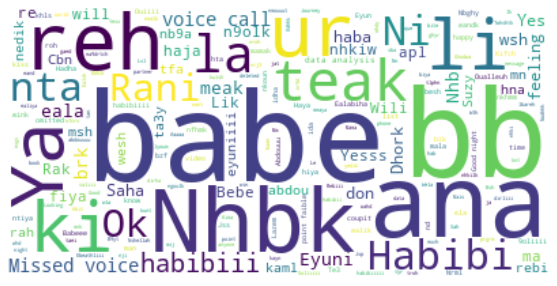

In [12]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Queen 👑


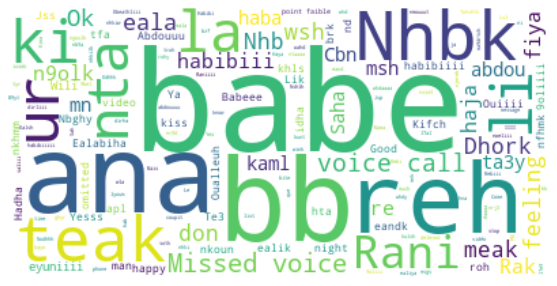

Author name Abdesamie


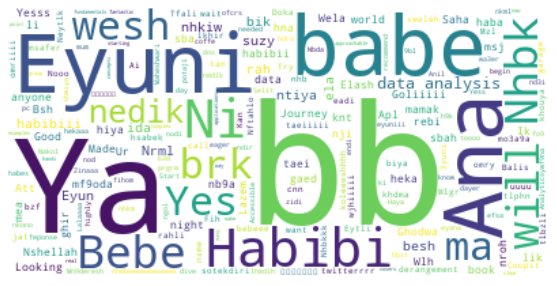

In [13]:
l = ['Queen 👑','Abdesamie']
dummy_df = messages_df[messages_df['Author'] == 'Abdesamie']


for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    #Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    #Display the generated image   
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## In conclusion
this process allows for a straightforward analysis of WhatsApp chats between you and anyone - be it a friend, customer, or a group. Moreover, the extracted data can serve as a valuable resource for various other natural language processing tasks.